In [1]:
import numpy as np
from matplotlib import pyplot as plt

from synet.networks import random_network
from synet.process import DelayProcess, DiseaseProcess, MajorityProcess
from synet.utils import apply_process, apply_measures
from synet.visualization import plot_process_results, plot_measure_results
from synet.visualization import plot_process_v_measure, plot_pvm_dt, plot_measure_v_process

In [2]:
n_networks = 10
process_dt = 250
n_events = 5000
np.random.seed(1298734)

In [3]:
delay = DelayProcess()
majority = MajorityProcess()
disease = DiseaseProcess()

In [4]:
%%time
networks = [random_network(n_events=n_events) for _ in range(n_networks)]

CPU times: user 1.53 s, sys: 0 ns, total: 1.53 s
Wall time: 1.53 s


In [5]:
%%time
majority_results = apply_process(networks, process=majority, dt=process_dt, n_sim=50, n_jobs=32)
delay_results = apply_process(networks, process=delay, dt=process_dt, n_sim=128, n_jobs=32)
disease_results = apply_process(networks, process=disease, dt=process_dt, n_sim=128, n_jobs=32)

CPU times: user 1.12 s, sys: 4.36 s, total: 5.47 s
Wall time: 15.4 s


In [6]:
%%time
measure_results = apply_measures(networks, measures="mixing", max_dt=100)

CPU times: user 2.66 s, sys: 0 ns, total: 2.66 s
Wall time: 2.66 s


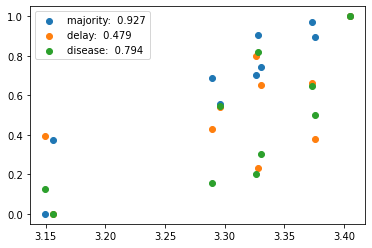

In [7]:
process_results = {"majority": majority_results, "delay": delay_results, "disease": disease_results}
plot_measure_v_process(measure_results, process_results)